In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] = iris.target

In [4]:
# Split features and target variable
x = df.drop('target', axis=1)
y = df['target']

In [5]:
# Create a Decision Tree Classifier
dtree = DecisionTreeClassifier()
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Train the Decision Tree Classifier
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [6]:
# Evaluate the model using confusion matrix and classification report
y_pred = dtree.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
# Perform K-fold cross-validation
k = 5 # Number of folds
cv_scores = cross_val_score(dtree, x, y, cv=k)
# Print cross-validation scores
print("\nCross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean accuracy: 0.9666666666666668


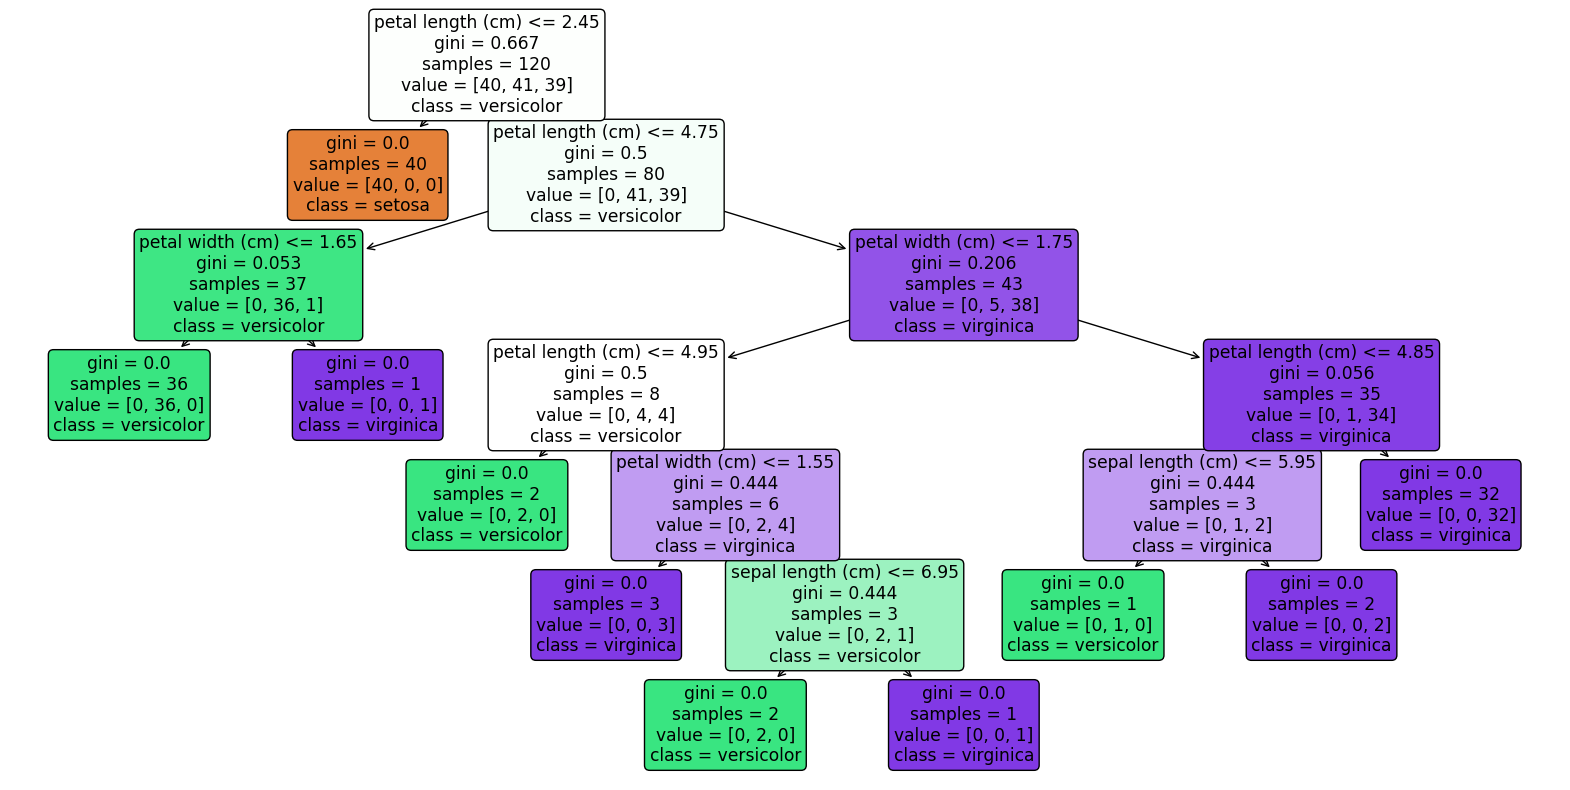

In [12]:
# Convert class_names array to a list
class_names_list = list(iris.target_names)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, filled=True, rounded=True, feature_names=iris.feature_names, class_names=class_names_list)
plt.show()
